# Exploración de datos en python

En este notebook se presentan maneras de representar los datos mediantes gráficos; a su vez, se muestra la construcción de la función de distribución de probabilidad empírica para una variable.

In [1]:
# Importación de módulos/paquetes

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [27]:
df.columns = ['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendarei']

In [28]:
df

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendarei
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [2]:
df = pd.read_csv("Pokemon.csv",index_col=0) # Se cargan los datos de un archivo csv

Previo a la realización de cualquier análisis estadístico es fundamental realizar un análisis exploratorio de los datos, donde se pueden ver inicialmente comportaminetos que darán claridad y perspectiva para los análisis posteriores.

In [3]:
df.describe() # Descripción general de las observaciones

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


<Figure size 576x360 with 0 Axes>

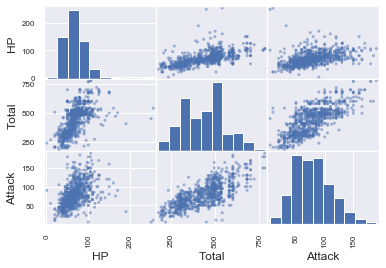

In [24]:
plt.figure(figsize=(8,5))
pd.plotting.scatter_matrix(df[["HP","Total","Attack"]])
plt.savefig("Dispersión.jpg")
plt.show()

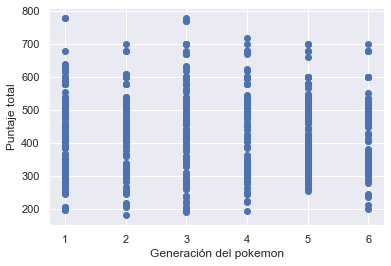

In [18]:
plt.scatter(df["Generation"], df["Total"])
plt.xlabel("Generación del pokemon")
plt.ylabel("Puntaje total")
plt.show()

# Visualización 

## Histogramas

Se usa el dataset de pokémon para analizar sus características. Inicialente se realiza un histograma sobre las habilidades de ataque para las criaturas de todas las generaciones

In [4]:
sns.set()    # Se habilita el módulo de seaborn para una visualización más estética

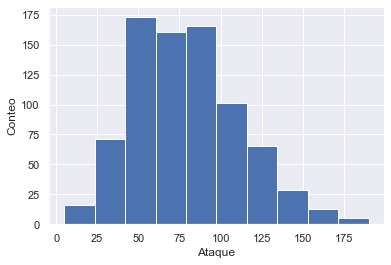

In [5]:
plt.hist(df.Attack)    # Crear el histograma
plt.xlabel("Ataque")   # Nombre del eje x
plt.ylabel("Conteo");  # Nombre del eje y

## Diagramas de barra

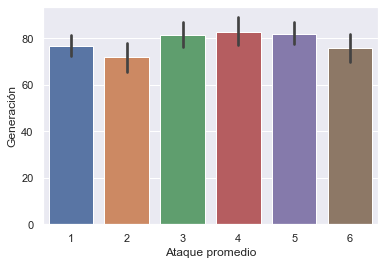

In [6]:
sns.barplot(x="Generation",y="Attack", data=df,)
plt.xlabel("Ataque promedio")   # Nombre del eje x
plt.ylabel("Generación");  # Nombre del eje y
plt.show()

## Mapa de calor

In [7]:
# Agrupar los valores medios por generación
df_1 = df.groupby(by="Generation").mean()

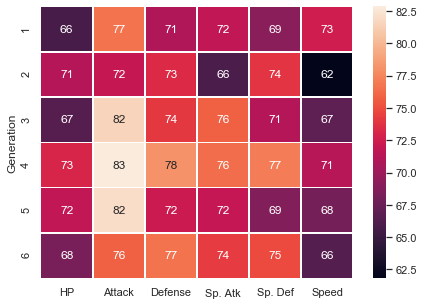

In [8]:
plt.figure(figsize=(7,5))
sns.heatmap(data=df_1[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']], annot=True, linewidths=.5)
plt.show()

## Diagramas de enjambre (o de puntos)

Este tipo de diagrama permite ver que tan dispersas están las observaciones para cada una de las clases (en este caso para cada una de las generaciones)

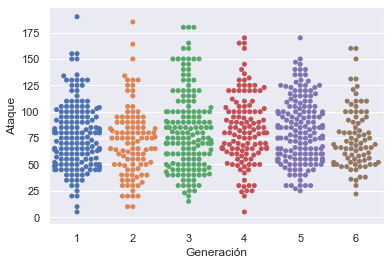

In [9]:
sns.swarmplot(x="Generation", y="Attack", data=df)
plt.xlabel("Generación")
plt.ylabel("Ataque");

Tambien se podría realizar un gráfico de cajas para representar información adicional asociada con los percentiles

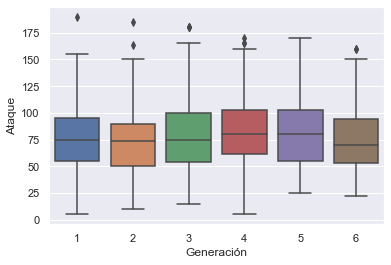

In [10]:
# Comparación de generaciones y puntos de ataque

sns.boxplot(x="Generation", y="Attack", data=df)
plt.xlabel("Generación")
plt.ylabel("Ataque")
plt.show()

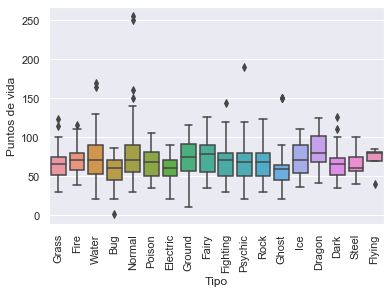

In [11]:
# Comparación entre tipos de pokemon y sus puntos de salud (vida)

sns.boxplot(x="Type 1", y="HP", data=df) # Visualizar múltiples diagramas de caja en uno solo
plt.xlabel("Tipo")                       # Agregar etiqueta al eje x
plt.ylabel("Puntos de vida")             # Agregar etiqueta al eje y
plt.xticks(rotation=90);                 # Rotación de los nombres en los eje

## Gráfico de dispersión

En algunas situaciones también se desea evaluar el comportamiento de una variable cuando otra cambia, es decir, se busca evaluar si están correlacionadas. Una manera de visualizar esta correlación es mediante los gráficos de dispersión.

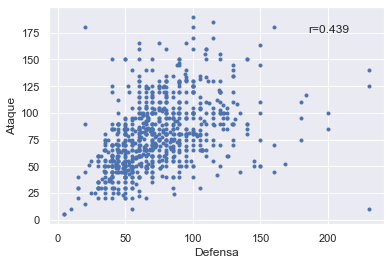

In [12]:
x = df.Defense    # Se crea una variable x asociada a los puntos de ataque
y = df.Attack     # Se crea una variable y asociada a los puntos de defensa

plt.plot(x, y, marker=".", linestyle="none") 
plt.xlabel("Defensa") 
plt.ylabel("Ataque")
plt.text(185,175, "r=%.3f" % np.corrcoef(x,y)[0,1]); # Se agrega texto del coeficiente de correlación

## Función emprírica de distribución acumulada

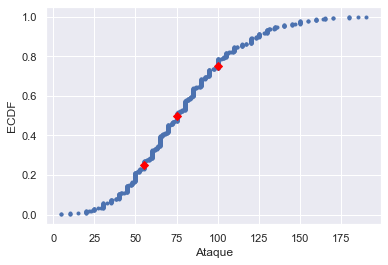

In [13]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

x,y = ecdf(df.Attack)
plt.plot(x,y,marker=".",linestyle="none")
plt.xlabel("Ataque")
plt.ylabel("ECDF");

# Agregar los percentiles
percentiles = np.array([25,50,75])
perc = np.percentile(df.Attack,percentiles)

plt.plot(perc, percentiles/100, marker="D", linestyle="none", color="red");